In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1651,ham,I wan but too early lei... Me outside now wun ...,NaN,NaN,NaN
2214,ham,Ok then i'll let him noe later n ask him call ...,NaN,NaN,NaN
628,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,NaN,NaN,NaN
1263,ham,Ok. No wahala. Just remember that a friend in ...,NaN,NaN,NaN
4485,ham,have * good weekend.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

1.Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# dropping useless columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3935,ham,They r giving a second chance to rahul dengra.
2254,ham,Ok. Me watching tv too.
5552,ham,Have a safe trip to Nigeria. Wish you happines...
2892,ham,K I'll be sure to get up before noon and see w...
3240,ham,Ok i've sent u da latest version of da project.


In [9]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4232,ham,My love ... I hope your not doing anything dra...
4370,ham,Purity of friendship between two is not about ...
5318,ham,"Good morning, my Love ... I go to sleep now an..."
1456,ham,U sleeping now.. Or you going to take? Haha.. ...
1031,ham,Yup bathe liao...


In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['target']=le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check duplicate values
df.duplicated().sum()

np.int64(403)

In [13]:
# remove duplicates
df= df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

# 2. EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

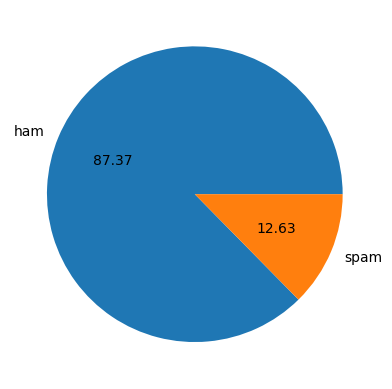

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data is imbalanced

In [18]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# num of characters
df['num_characters']=df['text'].apply(len)

In [21]:
df.head(4)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [22]:
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
# number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.sample(4)

,target,text,num_characters,num_words
3633,0,Its a big difference. &lt;#&gt; versus &lt;...,73,29
4695,0,A guy who gets used but is too dumb to realize...,50,13
4914,0,We took hooch for a walk toaday and i fell ove...,134,30
4250,0,Omg Joanna is freaking me out. She's looked th...,183,44


In [26]:
# number of sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head(4)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Analysing ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Analysing spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

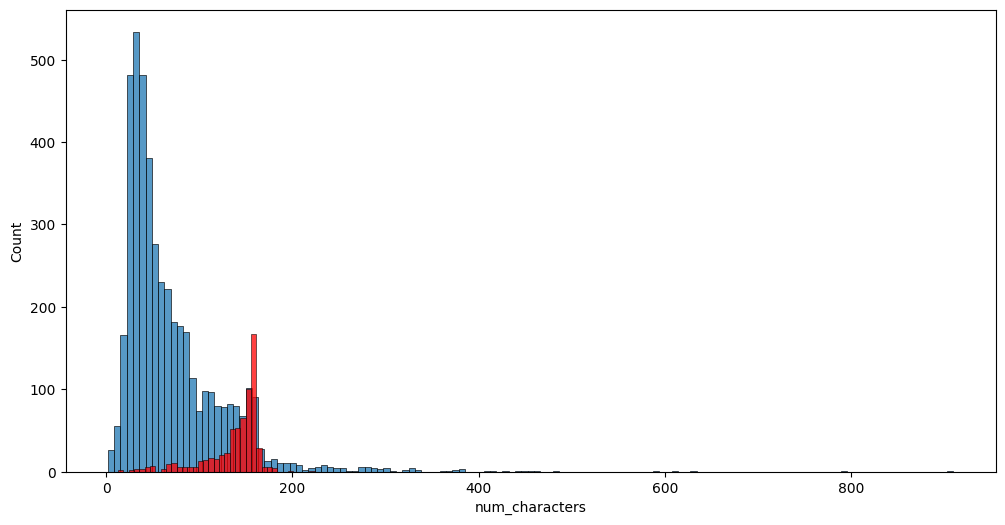

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

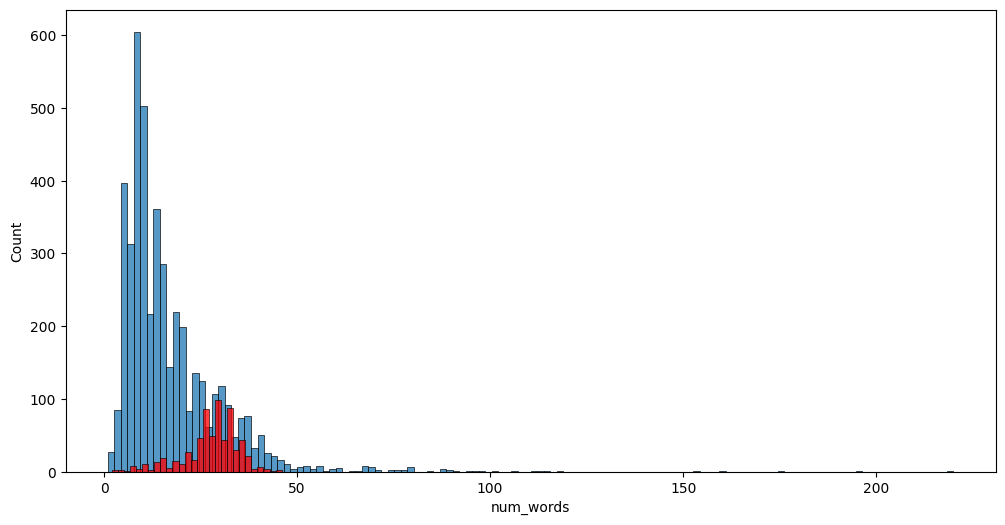

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

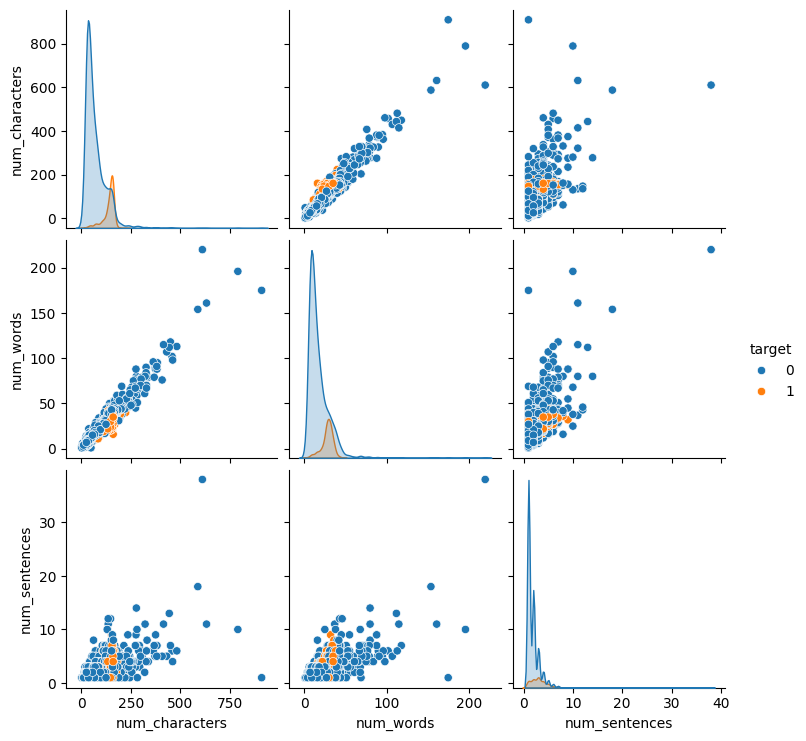

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

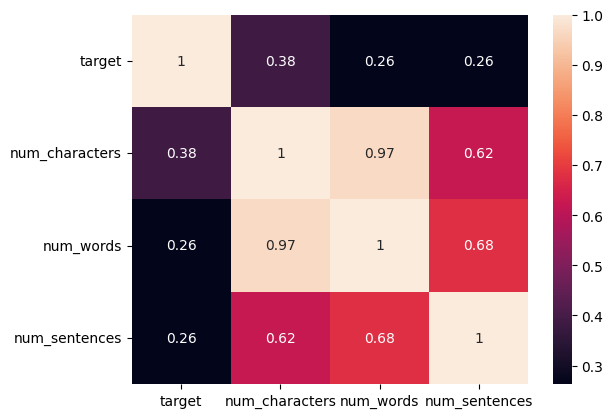

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters                                                                                
4.Removing stop words and punctuation
5. stemming

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Dancing')

'danc'

In [38]:
import string


def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
transform_text('Hi! How are you, Harshita? I am liking you')

'hi harshita like'

In [40]:
transform_text(df['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head(4)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [43]:
from wordcloud import WordCloud

In [44]:
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

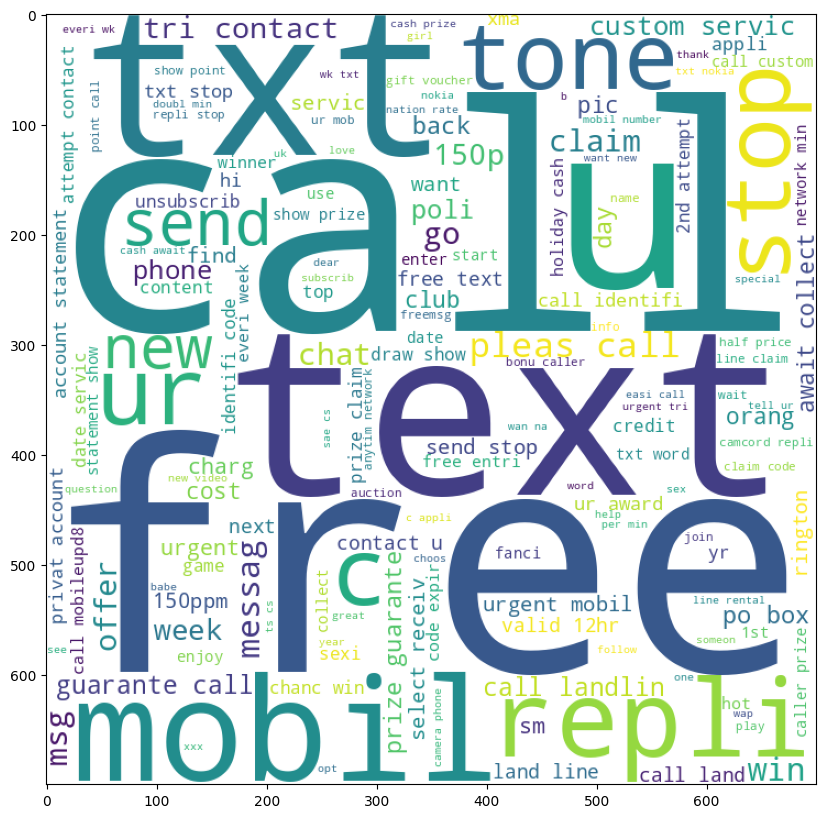

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

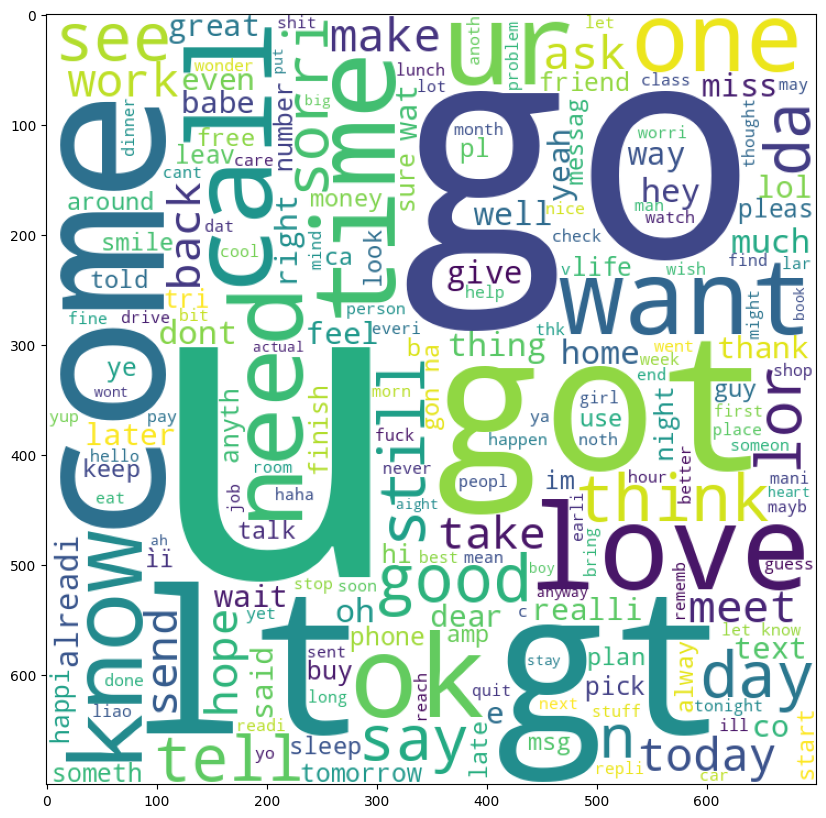

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for mssg in df[df['target']==1]['transformed_text'].tolist():
    for word in mssg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

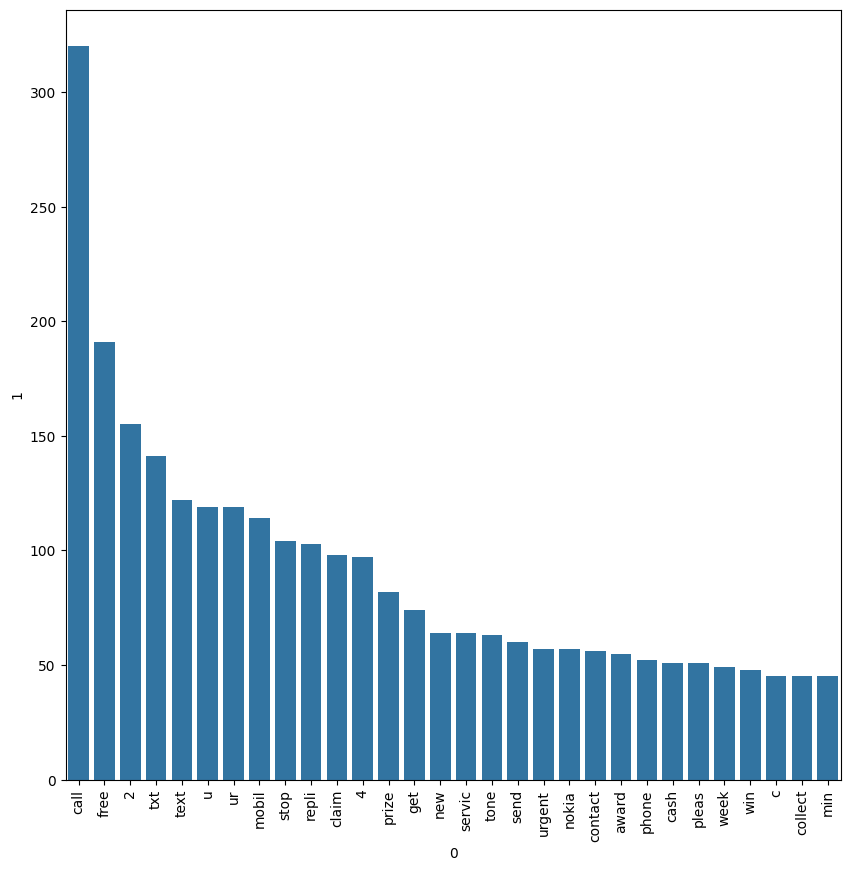

In [51]:
from collections import Counter
plt.figure(figsize=(10,10))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus=[]

for mssg in df[df['target']==0]['transformed_text'].tolist():
    for word in mssg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

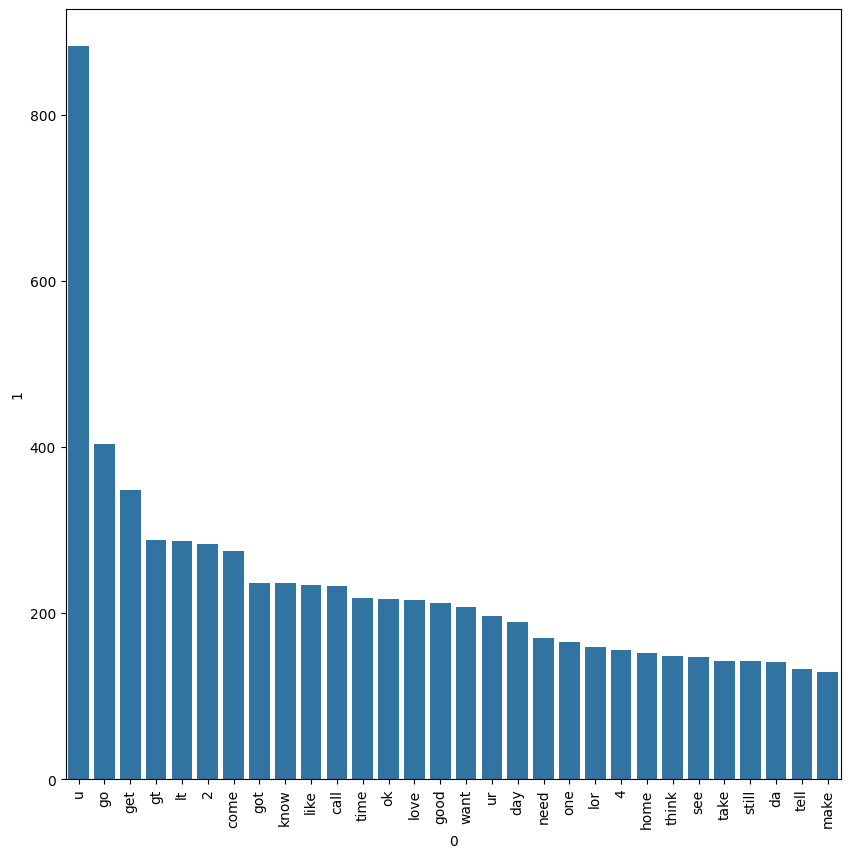

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# Model Building

In [52]:
# Text vectorization using Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
# tfid=TfidfVectorizer()
tfid=TfidfVectorizer(max_features=3000)

# Pipeline

In [76]:
x=df['transformed_text']
y=df['target'].values

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
# Define Pipeline
pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

# Define Parameter grid
param_grid = { 'tfidf__ngram_range': [(1,1), (1,2)], 
              'tfidf__max_features': [2000, 5000], 
              'tfidf__min_df': [2, 5], 
              'tfidf__max_df': [0.7, 0.8], 
              'tfidf__use_idf': [True], 
              'tfidf__sublinear_tf': [True, False],
              'tfidf__norm': ['l2', 'l1'], 
              'nb__alpha': [0.001, 0.01, 0.05, 0.1, 0.5],
              'nb__fit_prior': [True, False] 
              }

# Run GridSearchCV
grid= GridSearchCV(pipeline,param_grid,cv=5,n_jobs=-1,verbose=2)
grid.fit(x_train,y_train)

print("Best Parameters: ",grid.best_params_)
print("Best CV scores: ",grid.best_score_)
best_model=grid.best_estimator_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Parameters:  {'nb__alpha': 0.1, 'nb__fit_prior': True, 'tfidf__max_df': 0.7, 'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': False, 'tfidf__use_idf': True}
Best CV scores:  0.9801692865779927


In [79]:
from sklearn.metrics import accuracy_score,precision_score
y_pred=best_model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))

Accuracy:  0.9796905222437138
Precision:  0.975609756097561


# Normal Model Training

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [81]:
X=tfid.fit_transform(df['transformed_text']).toarray()

In [82]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(X)

In [ ]:
#x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [83]:
x.shape

(5169, 3000)

In [84]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [85]:
Y=df['target'].values

In [86]:
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [89]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

87.62088974854933
[[793 103]
 [ 25 113]]
52.31481481481482


In [90]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [65]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

97.00193423597679
[[893   3]
 [ 28 110]]
97.34513274336283


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimator=50,random_state=2)

In [109]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [110]:
def train_classifir(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [86]:
train_classifir(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [111]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifir(clf,x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96


d:\Study_Tutorials\Spam_Sms_Detection\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\Study_Tutorials\Spam_Sms_Detection\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307


d:\Study_Tutorials\Spam_Sms_Detection\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:29:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [72]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
10,xgb,0.972921,0.929688
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.951644
6,xgb,Accuracy,0.972921
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


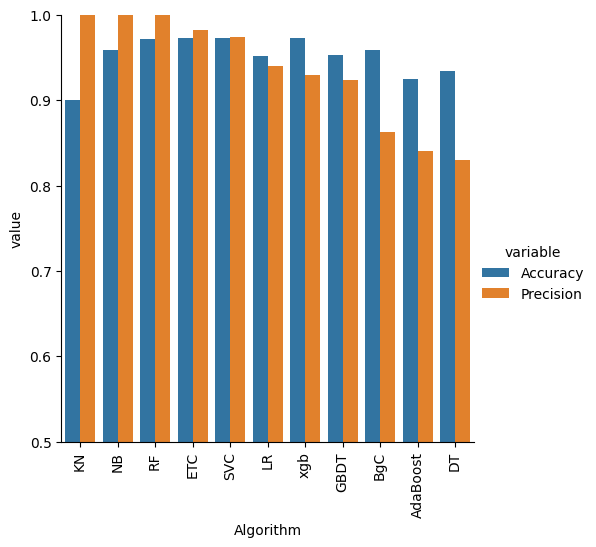

In [76]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
#  model improve
# 1. change the number of  max_features in TfidfVectorizer
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df.head()

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790


In [ ]:
#2.scale the input
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [99]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled.head()

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790


In [112]:
# 3.appending the num_character col to X
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [113]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.951644,0.940000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.972921,0.929688,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
7,GBDT,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225


# Trying voting classifier

In [114]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [115]:
from sklearn.ensemble import VotingClassifier

In [116]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [117]:
voting.fit(x_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [119]:
y_pred=voting.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred)*100)
print('Precision: ',precision_score(y_test,y_pred)*100)

Accuracy:  97.96905222437138
Precision:  98.34710743801654


# Applying Stacking

In [120]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [121]:
from sklearn.ensemble import StackingClassifier

In [122]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [124]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


# Exporting the tfidf vectorizer and multinomialbayesian model

In [91]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
